# Classifications with ML

In [94]:
# Import dependencies
import pandas as pd

# Read CSV file into a pandas dataframe

# File paths
path = 'Data/parkinsons.data'

# Using pd.read_csv() method to read the data into a pandas dataframe
classification_df = pd.read_csv(path)

# Print the first 5 rows of the dataframe
print(classification_df.head())

             name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0           0.00007   0.00370   0.00554     0.01109       0.04374  ...   
1           0.00008   0.00465   0.00696     0.01394       0.06134  ...   
2           0.00009   0.00544   0.00781     0.01633       0.05233  ...   
3           0.00009   0.00502   0.00698     0.01505       0.05492  ...   
4           0.00011   0.00655   0.00908     0.01966       0.06425  ...   

   Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
0      0.0654

In [95]:
# Remove name column
classification_df = classification_df.drop('name', axis=1)

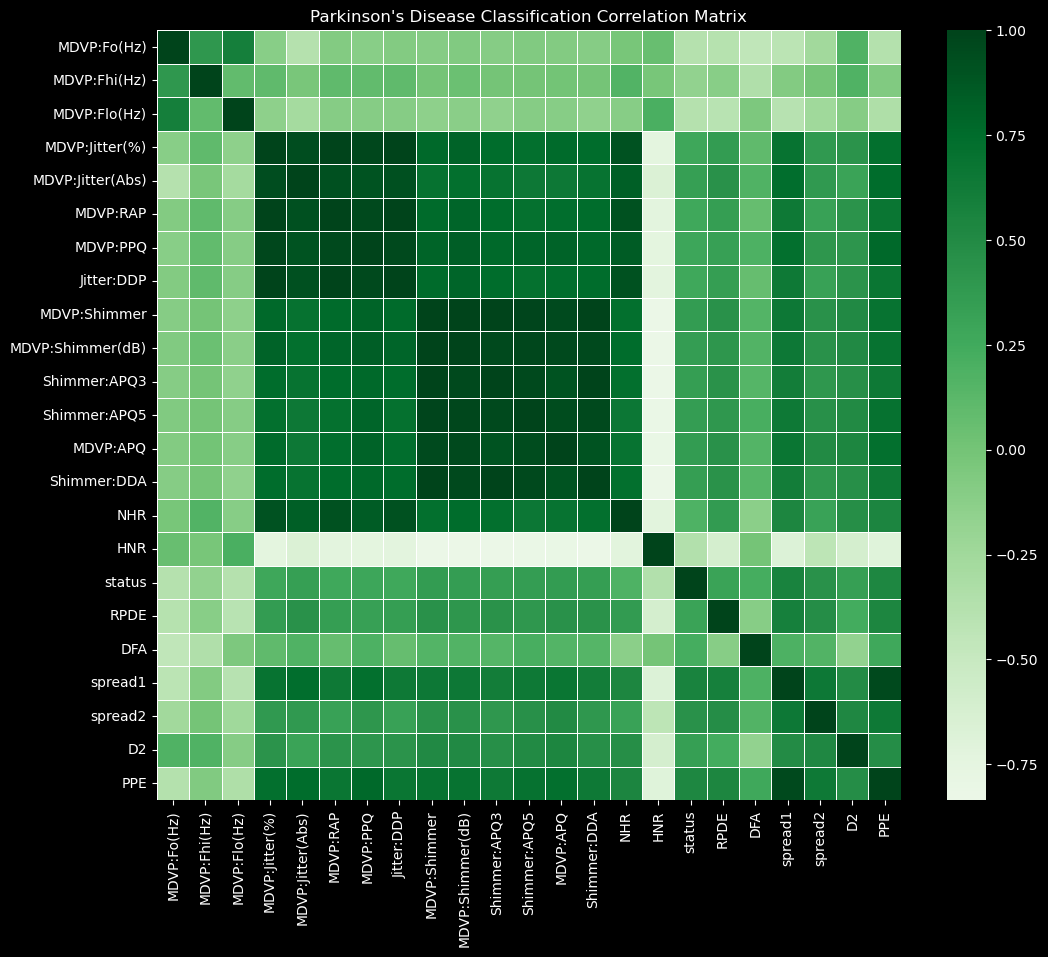

In [136]:
import matplotlib.pyplot as plt
import seaborn as sns

def make_corr_vis(name, data, columns):
    # Calculate correlation
    corr = data[columns].corr()

    # Create a heatmap using seaborn
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr,center=0, linewidths=0.5, cmap="Greens")
    plt.title(f'{name} Correlation Matrix')
    plt.show()

# Define the columns you want to include in the correlation matrix
classification_columns = ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE']

# Call the function with your DataFrame and columns
make_corr_vis("Parkinson's Disease Classification", classification_df, classification_columns)


In [97]:
# Build model to create classifications based on classifications_df.status (1 = Parkinsons, 0 = Healthy)

# Import dependencies
from sklearn.model_selection import train_test_split

# Create the features (X) and target (y) sets
X = classification_df.drop(columns='status')
y = classification_df[['status']]
print(X.shape)
print(y.shape)

(195, 22)
(195, 1)


In [98]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Create a StandardScaler instance
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Creating a Linear Regression Model

In [99]:
# Create a LogisticRegression model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='lbfgs', random_state=1)

# Train the model
classifier.fit(X_train_scaled, y_train)

# Evaluate the model
print(f'Training Data Score: {classifier.score(X_train_scaled, y_train)}')

Training Data Score: 0.8493150684931506


b:\CONDA\install\envs\amd_dev_2\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [100]:
# Make predictions
predictions = classifier.predict(X_test_scaled)
results = pd.DataFrame({
    'Prediction': predictions,
    'Actual': y_test['status']
}).reset_index(drop=True)

# Print the first 5 rows of the results
print(results.head())

   Prediction  Actual
0           1       1
1           1       1
2           1       1
3           1       0
4           1       1


In [101]:
# Print the accuracy score
from sklearn.metrics import accuracy_score

# Store prediction and accuracy scores for logistic regression
logistic_regression_prediction = predictions
logistic_regression_accuracy = accuracy_score(y_test['status'], predictions)

print(accuracy_score(y_test['status'], predictions))

0.8571428571428571


In [102]:
# Print the confusion matrix
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test['status'], predictions))

[[ 8  4]
 [ 3 34]]


In [103]:
# Print the classification report
from sklearn.metrics import classification_report

print(classification_report(y_test['status'], predictions))

              precision    recall  f1-score   support

           0       0.73      0.67      0.70        12
           1       0.89      0.92      0.91        37

    accuracy                           0.86        49
   macro avg       0.81      0.79      0.80        49
weighted avg       0.85      0.86      0.85        49



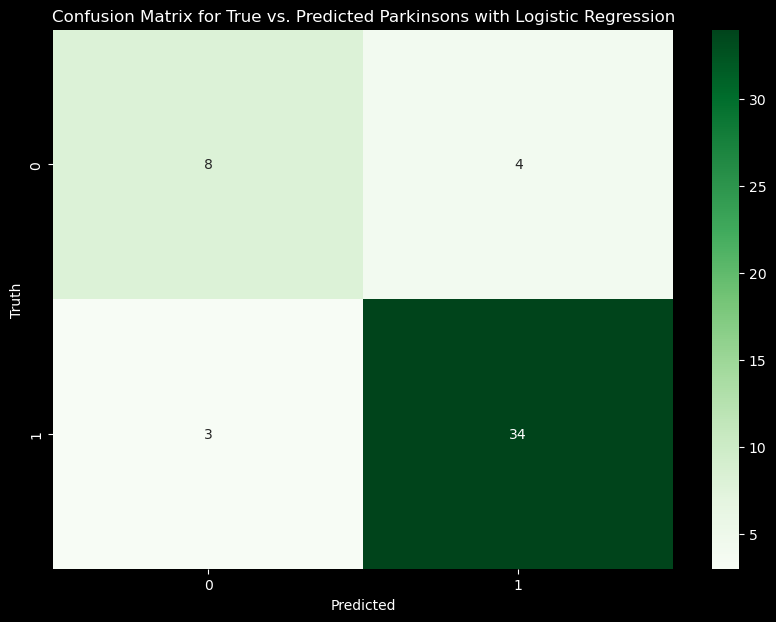

In [104]:
# Logistic Regression model visualization
import matplotlib.pyplot as plt
# Import scikit-learn
from sklearn import metrics
from sklearn.metrics import confusion_matrix
# Import seaborn
import seaborn as sns

# Plot the confusion matrix
cm = confusion_matrix(y_test, classifier.predict(X_test_scaled))

# Use seaborn to plot confusion matrix, add labesl using matplotlib
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix for True vs. Predicted Parkinsons with Logistic Regression')
plt.show()

### Creating a Random Forest Classifier

In [105]:
# Create a random forest classifier
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=128, random_state=78)

# Fit the model
rf_model = rf_model.fit(X_train_scaled, y_train)

b:\CONDA\install\envs\amd_dev_2\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [106]:
# Evaluate the model
print(f'Training Data Score: {rf_model.score(X_train_scaled, y_train)}')
print(f'Testing Data Score: {rf_model.score(X_test_scaled, y_test)}')

Training Data Score: 1.0
Testing Data Score: 0.8979591836734694


In [107]:
# Make predictions
predictions = rf_model.predict(X_test_scaled)
results = pd.DataFrame({
    'Prediction': predictions,
    'Actual': y_test['status']
}).reset_index(drop=True)

In [108]:
# Print the first 5 rows of the results
print(results.head())

   Prediction  Actual
0           1       1
1           1       1
2           1       1
3           0       0
4           1       1


In [109]:
# Store the rf_model predictions and accuracy score
rf_predictions = predictions
rf_acc_score = accuracy_score(y_test['status'], predictions)

# Print the accuracy score
print(accuracy_score(y_test['status'], predictions))

0.8979591836734694


In [110]:
# Print the confusion matrix
print(confusion_matrix(y_test['status'], predictions))

[[ 8  4]
 [ 1 36]]


In [111]:
# Print the classification report
print(classification_report(y_test['status'], predictions))

              precision    recall  f1-score   support

           0       0.89      0.67      0.76        12
           1       0.90      0.97      0.94        37

    accuracy                           0.90        49
   macro avg       0.89      0.82      0.85        49
weighted avg       0.90      0.90      0.89        49



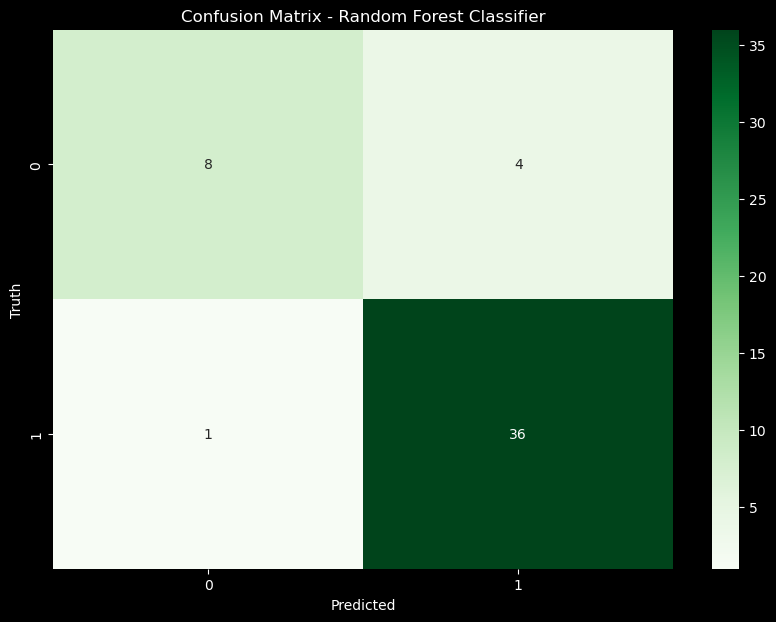

In [112]:
# Random Forest model visualization
cm_rf = confusion_matrix(y_test['status'], rf_predictions)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix - Random Forest Classifier')
plt.show()

In [113]:
# Create a support vector machine classifier
from sklearn.svm import SVC

# Create the SVM model
svm_model = SVC(kernel='linear')

# Train the model
svm_model.fit(X_train_scaled, y_train)

# Evaluate the model
print(f'Training Data Score: {svm_model.score(X_train_scaled, y_train)}')



Training Data Score: 0.8767123287671232


b:\CONDA\install\envs\amd_dev_2\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [114]:
# Make predictions
predictions = svm_model.predict(X_test_scaled)
results = pd.DataFrame({
    'Prediction': predictions,
    'Actual': y_test['status']
}).reset_index(drop=True)

# Print the first 5 rows of the results
print(results.head())

   Prediction  Actual
0           1       1
1           1       1
2           1       1
3           1       0
4           1       1


In [115]:
# Store the SVM model predictions and accuracy score
svm_predictions = predictions
svm_acc_score = accuracy_score(y_test['status'], predictions)

# Print the accuracy score
print(accuracy_score(y_test['status'], predictions))

0.8775510204081632


In [116]:
# Print the confusion matrix
print(confusion_matrix(y_test['status'], predictions))

[[ 8  4]
 [ 2 35]]


In [117]:
# Print the classification report
print(classification_report(y_test['status'], predictions))

              precision    recall  f1-score   support

           0       0.80      0.67      0.73        12
           1       0.90      0.95      0.92        37

    accuracy                           0.88        49
   macro avg       0.85      0.81      0.82        49
weighted avg       0.87      0.88      0.87        49



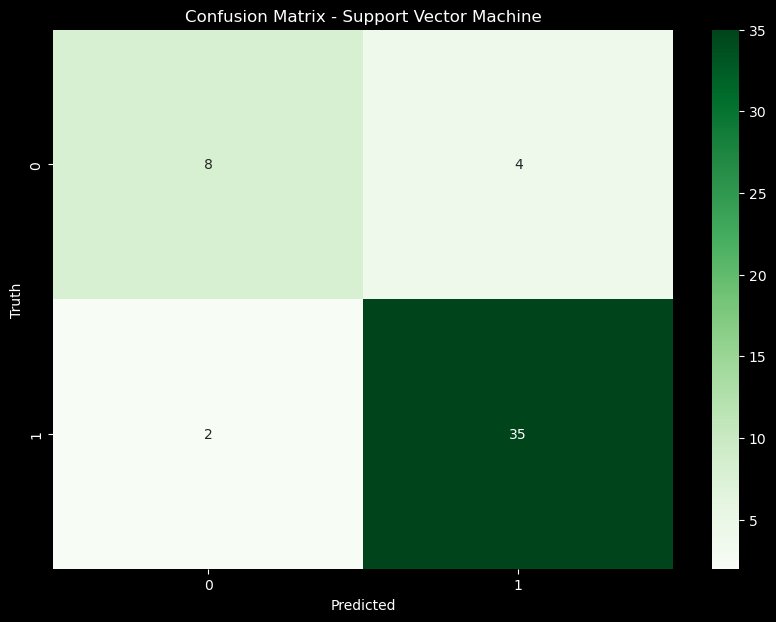

In [118]:
#   Support Vector Machine confusion Matrix Heatmap
cm_svm = confusion_matrix(y_test['status'], svm_predictions)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix - Support Vector Machine')
plt.show()

In [119]:
# Build a neural network model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [120]:
# Import keras tuner to use to create a model with hyperparameters

# Import dependencies
import keras_tuner as kt

In [121]:
# Use keras tuner to find the best learning rate and parameters for the model

# Define the model
def create_nn_model(hp):
    # Create a sequential model
    nn = tf.keras.models.Sequential()

    # Add our first hidden layer where the input dimensions are the 45 columns of our dataset
    # Make Keras Tuner find the optimal number of nodes in this layer
    # Make Keras Tuner find the optimal activation function to use in this layer
    nn.add(tf.keras.layers.Dense(units=hp.Int('first_units',
                                        min_value=1,
                                        max_value=80,
                                        step=2), input_dim=22, activation=hp.Choice('first_activation', ['relu', 'tanh', 'sigmoid'])))
    
    # Make Keras Tuner find the optimal number of hidden layers to use
    # Make Keras Tuner find the optimal number of nodes to use in each hidden layer
    # Make Keras Tuner find the optimal activation function to use in each hidden layer
    for i in range(hp.Int('num_layers', 1, 6)):
        nn.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=1,
                                            max_value=80,
                                            step=2),
                               activation=hp.Choice('activation_' + str(i), ['relu', 'tanh', 'sigmoid'])))
        
    # Add our output layer
    # Make Keras Tuner find the optimal activation function to use in the output layer
    nn.add(tf.keras.layers.Dense(units=1, activation=hp.Choice('output_activation', ['relu', 'tanh', 'sigmoid'])))

    # Compile our model
    # Make Keras Tuner find the optimal learning rate to use[1e-2, 1e-3, 1e-4]
    # nn.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(hp.Choice('learning_rate', )), metrics=["accuracy"])
    nn.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])), metrics=["accuracy"])

    # Return our model
    return nn

In [122]:
# Create a Keras Tuner Hyperband tuner
tuner = kt.Hyperband(create_nn_model,
                     objective='val_accuracy',
                     max_epochs=80,
                     factor=3,
                     directory='KerasTunerTrials',
                     project_name='KerasTunerTrials')

# Run the Keras Tuner search for best hyperparameters
tuner.search(X_train_scaled, y_train, epochs=40, validation_data=(X_test_scaled, y_test))

Reloading Tuner from KerasTunerTrials\KerasTunerTrials\tuner0.json


In [123]:
# Get the optimal hyperparameters
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]

# Display the optimal hyperparameters
best_hyperparameters.values

{'first_units': 73,
 'first_activation': 'tanh',
 'num_layers': 3,
 'units_0': 57,
 'activation_0': 'relu',
 'output_activation': 'sigmoid',
 'learning_rate': 0.01,
 'units_1': 63,
 'activation_1': 'relu',
 'units_2': 37,
 'activation_2': 'relu',
 'units_3': 39,
 'activation_3': 'sigmoid',
 'units_4': 13,
 'activation_4': 'relu',
 'units_5': 21,
 'activation_5': 'sigmoid',
 'tuner/epochs': 27,
 'tuner/initial_epoch': 9,
 'tuner/bracket': 2,
 'tuner/round': 1,
 'tuner/trial_id': '0053'}

In [124]:
# Create a new model with the optimal hyperparameters
optimized_model = tuner.get_best_models(1)[0]

# Evaluate the model using the test data
optimized_model_loss, optimized_model_accuracy = optimized_model.evaluate(X_test_scaled, y_test, verbose=2)

# Print the model loss and accuracy results
print(f"Loss: {optimized_model_loss}, Accuracy: {optimized_model_accuracy}")

2/2 - 0s - loss: 0.1388 - accuracy: 0.9592 - 175ms/epoch - 88ms/step
Loss: 0.13882696628570557, Accuracy: 0.9591836929321289


In [125]:
# Print the summary of the optimized model
optimized_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 73)                1679      
                                                                 
 dense_1 (Dense)             (None, 57)                4218      
                                                                 
 dense_2 (Dense)             (None, 63)                3654      
                                                                 
 dense_3 (Dense)             (None, 37)                2368      
                                                                 
 dense_4 (Dense)             (None, 1)                 38        
                                                                 
Total params: 11957 (46.71 KB)
Trainable params: 11957 (46.71 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [126]:
# Import numpy to use np.round() method to round the predictions to 0 or 1
import numpy as np

In [127]:
# Make predictions
predictions = optimized_model.predict(X_test_scaled)

# Print the first 5 predictions
print(predictions[:5])

2/2 [==============================] - 0s 2ms/step
[[0.9904494 ]
 [0.9218485 ]
 [1.        ]
 [0.31228817]
 [1.        ]]


In [128]:
# Print the first 5 actual values
print(y_test[:5])

     status
132       1
16        1
18        1
51        0
164       1


In [129]:
# Print the accuracy score
print(accuracy_score(y_test, np.round(predictions)))

0.9591836734693877


In [130]:
# Print the confusion matrix
print(confusion_matrix(y_test, np.round(predictions)))

[[11  1]
 [ 1 36]]


In [131]:
import itertools
nn_acc_score = accuracy_score(y_test, np.round(predictions))

# Store predictions
nn_predictions_dirty = np.round(predictions)

# Round the predictions to 0 or 1 and store them for comparison
# Convert the list of lists to a flat list
# Convert the values in nn_predictions to 1 or 0
nn_predictions = [int(prediction) for prediction in nn_predictions_dirty]

# Print the classification report
print(classification_report(y_test, nn_predictions))




              precision    recall  f1-score   support

           0       0.92      0.92      0.92        12
           1       0.97      0.97      0.97        37

    accuracy                           0.96        49
   macro avg       0.94      0.94      0.94        49
weighted avg       0.96      0.96      0.96        49



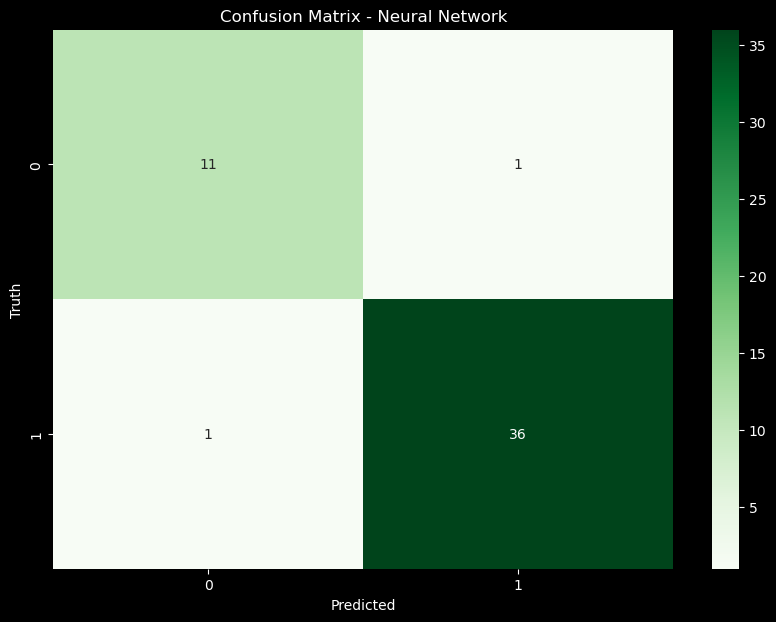

In [132]:
#   Neural Network confusion Matrix Heatmap
cm_nn = confusion_matrix(y_test, np.round(nn_predictions))
plt.figure(figsize=(10, 7))
sns.heatmap(cm_nn, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix - Neural Network')
plt.show()

In [133]:
# Create a dataframe to compare the models
models = ['Logistic Regression', 'Random Forest Classifier', 'Support Vector Machine', 'Neural Network']
model_predictions = [logistic_regression_prediction, rf_predictions, svm_predictions, nn_predictions]
model_acc_scores = [logistic_regression_accuracy, rf_acc_score, svm_acc_score, nn_acc_score]
model_comparison_df = pd.DataFrame({
    'Model': models,
    'Predictions': model_predictions,
    'Accuracy Score': model_acc_scores
})

# Order the dataframe by accuracy score descending
model_comparison_df = model_comparison_df.sort_values(by='Accuracy Score', ascending=False).reset_index(drop=True)

In [134]:
# Display the model comparison dataframe
model_comparison_df.head(5)

,Model,Predictions,Accuracy Score
0,Neural Network,"[1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, ...",0.959184
1,Random Forest Classifier,"[1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, ...",0.897959
2,Support Vector Machine,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, ...",0.877551
3,Logistic Regression,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, ...",0.857143


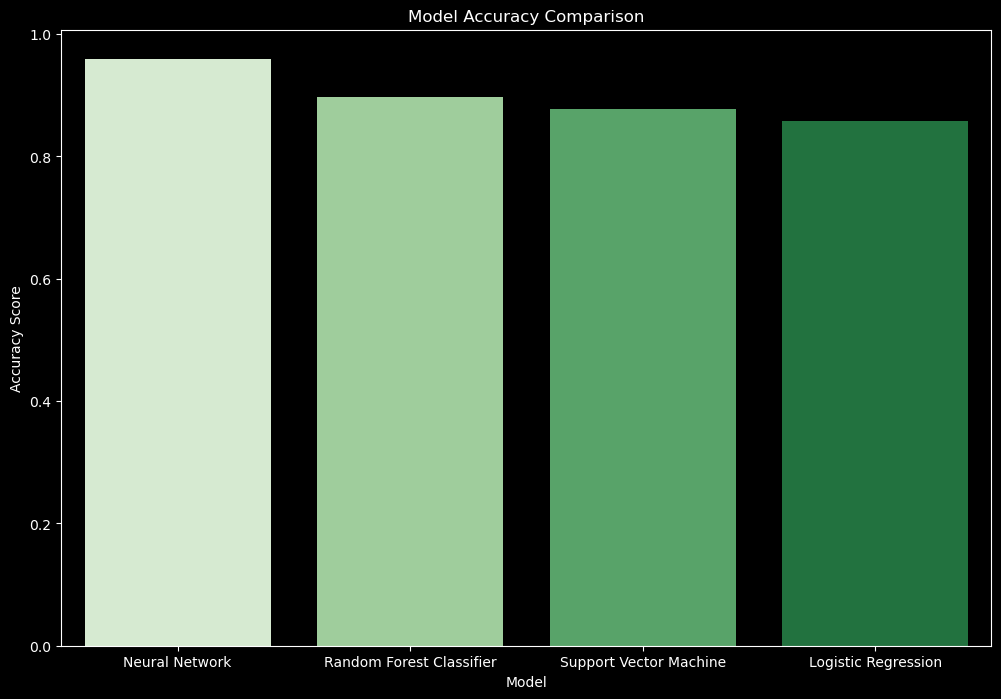

In [135]:
#Model Comparison Bar Plot 
plt.figure(figsize=(12, 8))
sns.barplot(x='Model', y='Accuracy Score', data=model_comparison_df,palette='Greens')
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy Score')
plt.show()
